In [1]:
from google.colab import files
data_to_load = files.upload()

Saving owid-co2-data.csv to owid-co2-data.csv


In [16]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

df = pd.read_csv("owid-co2-data.csv")

df.head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1755,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,1756,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1757,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1758,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1759,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [4]:
df.isna().sum()

,0
country,0
year,0
iso_code,7929
population,9172
gdp,34940
...,...
temperature_change_from_n2o,12131
total_ghg,12781
total_ghg_excluding_lucf,12955
trade_co2,45656


In [5]:
for column in df.columns:
  percentage_missing = df[column].isna().sum() / len(df) * 100
  print(f"Column {column}: {percentage_missing:.2f}% missing")

Column country: 0.00% missing
Column year: 0.00% missing
Column iso_code: 15.80% missing
Column population: 18.27% missing
Column gdp: 69.61% missing
Column cement_co2: 42.49% missing
Column cement_co2_per_capita: 49.48% missing
Column co2: 41.95% missing
Column co2_growth_abs: 46.24% missing
Column co2_growth_prct: 48.19% missing
Column co2_including_luc: 53.01% missing
Column co2_including_luc_growth_abs: 53.61% missing
Column co2_including_luc_growth_prct: 53.61% missing
Column co2_including_luc_per_capita: 53.19% missing
Column co2_including_luc_per_gdp: 66.55% missing
Column co2_including_luc_per_unit_energy: 80.67% missing
Column co2_per_capita: 47.84% missing
Column co2_per_gdp: 65.08% missing
Column co2_per_unit_energy: 79.38% missing
Column coal_co2: 56.66% missing
Column coal_co2_per_capita: 58.06% missing
Column consumption_co2: 90.31% missing
Column consumption_co2_per_capita: 91.03% missing
Column consumption_co2_per_gdp: 91.15% missing
Column cumulative_cement_co2: 42.54%

In [6]:
df_filtered = df[df['year'] >= 1880]

df_filtered

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
130,Afghanistan,1880,AFG,4288021.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,0.160,0.000,0.000,0.000,0.0,10.078,0.766,NaN,NaN
131,Afghanistan,1881,AFG,4307129.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,0.160,0.000,0.000,0.000,0.0,10.285,0.773,NaN,NaN
132,Afghanistan,1882,AFG,4326316.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,0.160,0.000,0.000,0.000,0.0,10.445,0.779,NaN,NaN
133,Afghanistan,1883,AFG,4345580.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,0.159,0.000,0.000,0.000,0.0,10.583,0.786,NaN,NaN
134,Afghanistan,1884,AFG,4364922.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,0.159,0.000,0.000,0.000,0.0,10.710,0.792,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [7]:
for column in df_filtered.columns:
  percentage_missing = df_filtered[column].isna().sum() / len(df) * 100
  print(f"Column {column}: {percentage_missing:.2f}% missing")

Column country: 0.00% missing
Column year: 0.00% missing
Column iso_code: 9.99% missing
Column population: 9.39% missing
Column gdp: 43.97% missing
Column cement_co2: 28.73% missing
Column cement_co2_per_capita: 30.23% missing
Column co2: 22.72% missing
Column co2_growth_abs: 26.14% missing
Column co2_growth_prct: 26.60% missing
Column co2_including_luc: 29.02% missing
Column co2_including_luc_growth_abs: 29.39% missing
Column co2_including_luc_growth_prct: 29.39% missing
Column co2_including_luc_per_capita: 29.14% missing
Column co2_including_luc_per_gdp: 40.85% missing
Column co2_including_luc_per_unit_energy: 53.20% missing
Column co2_per_capita: 26.49% missing
Column co2_per_gdp: 40.48% missing
Column co2_per_unit_energy: 51.91% missing
Column coal_co2: 35.36% missing
Column coal_co2_per_capita: 35.97% missing
Column consumption_co2: 62.84% missing
Column consumption_co2_per_capita: 63.56% missing
Column consumption_co2_per_gdp: 63.68% missing
Column cumulative_cement_co2: 28.78% m

In [8]:
threshold = 60

# Obtenir les colonnes dont le pourcentage manquant est supérieur au seuil
columns_to_drop = [col for col in df_filtered.columns
                   if df_filtered[col].isna().sum() / len(df_filtered) * 100 > threshold]

# Supprime les colonnes identifiées
df_filtered = df_filtered.drop(columns=columns_to_drop)

for column in df_filtered.columns:
  percentage_missing = df_filtered[column].isna().sum() / len(df) * 100
  print(f"Column {column}: {percentage_missing:.2f}% missing")

Column country: 0.00% missing
Column year: 0.00% missing
Column iso_code: 9.99% missing
Column population: 9.39% missing
Column cement_co2: 28.73% missing
Column cement_co2_per_capita: 30.23% missing
Column co2: 22.72% missing
Column co2_growth_abs: 26.14% missing
Column co2_growth_prct: 26.60% missing
Column co2_including_luc: 29.02% missing
Column co2_including_luc_growth_abs: 29.39% missing
Column co2_including_luc_growth_prct: 29.39% missing
Column co2_including_luc_per_capita: 29.14% missing
Column co2_including_luc_per_gdp: 40.85% missing
Column co2_per_capita: 26.49% missing
Column co2_per_gdp: 40.48% missing
Column coal_co2: 35.36% missing
Column coal_co2_per_capita: 35.97% missing
Column cumulative_cement_co2: 28.78% missing
Column cumulative_co2: 25.72% missing
Column cumulative_co2_including_luc: 29.02% missing
Column cumulative_coal_co2: 35.36% missing
Column cumulative_gas_co2: 42.36% missing
Column cumulative_luc_co2: 11.13% missing
Column cumulative_oil_co2: 28.03% missi

In [9]:

df_filtered['country'] = df_filtered['country'].fillna(df_filtered['country'].mode()[0])


for column in ['population']:
    df_filtered[column] = df_filtered[column].fillna(df_filtered[column].mean())

df_filtered

,country,year,iso_code,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
130,Afghanistan,1880,AFG,4288021.0,0.000,0.000,NaN,NaN,NaN,NaN,...,NaN,0.134,NaN,0.160,0.000,0.000,0.000,0.0,10.078,0.766
131,Afghanistan,1881,AFG,4307129.0,0.000,0.000,NaN,NaN,NaN,NaN,...,NaN,0.141,NaN,0.160,0.000,0.000,0.000,0.0,10.285,0.773
132,Afghanistan,1882,AFG,4326316.0,0.000,0.000,NaN,NaN,NaN,NaN,...,NaN,0.138,NaN,0.160,0.000,0.000,0.000,0.0,10.445,0.779
133,Afghanistan,1883,AFG,4345580.0,0.000,0.000,NaN,NaN,NaN,NaN,...,NaN,0.144,NaN,0.159,0.000,0.000,0.000,0.0,10.583,0.786
134,Afghanistan,1884,AFG,4364922.0,0.000,0.000,NaN,NaN,NaN,NaN,...,NaN,0.141,NaN,0.159,0.000,0.000,0.000,0.0,10.710,0.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,0.473,0.031,10.263,-0.942,-8.411,19.807,...,NaN,0.252,0.030,0.106,0.001,0.001,0.002,0.0,34.348,17.531
50187,Zimbabwe,2020,ZWE,15526888.0,0.496,0.032,8.495,-1.768,-17.231,17.430,...,NaN,0.260,0.028,0.105,0.001,0.001,0.002,0.0,31.323,15.775
50188,Zimbabwe,2021,ZWE,15797220.0,0.531,0.034,10.204,1.709,20.120,18.752,...,NaN,0.241,0.032,0.104,0.001,0.001,0.002,0.0,33.549,17.599
50189,Zimbabwe,2022,ZWE,16069061.0,0.531,0.033,10.425,0.221,2.169,18.447,...,NaN,0.227,0.028,0.103,0.001,0.001,0.002,0.0,33.772,17.910


In [10]:
from google.colab import files
uploaded  = files.upload()

Saving all.csv to all.csv


In [11]:
import io

df2 = pd.read_csv(io.BytesIO(uploaded['all.csv']))
df2.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [12]:
merged_df = pd.merge(df_filtered, df2, left_on='iso_code', right_on='alpha-3', how='inner')

merged_df

,country,year,iso_code,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,1880,AFG,4288021.0,0.000,0.000,NaN,NaN,NaN,NaN,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Afghanistan,1881,AFG,4307129.0,0.000,0.000,NaN,NaN,NaN,NaN,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
2,Afghanistan,1882,AFG,4326316.0,0.000,0.000,NaN,NaN,NaN,NaN,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
3,Afghanistan,1883,AFG,4345580.0,0.000,0.000,NaN,NaN,NaN,NaN,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
4,Afghanistan,1884,AFG,4364922.0,0.000,0.000,NaN,NaN,NaN,NaN,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31387,Zimbabwe,2019,ZWE,15271377.0,0.473,0.031,10.263,-0.942,-8.411,19.807,...,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
31388,Zimbabwe,2020,ZWE,15526888.0,0.496,0.032,8.495,-1.768,-17.231,17.430,...,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
31389,Zimbabwe,2021,ZWE,15797220.0,0.531,0.034,10.204,1.709,20.120,18.752,...,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
31390,Zimbabwe,2022,ZWE,16069061.0,0.531,0.033,10.425,0.221,2.169,18.447,...,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [13]:
merged_df = merged_df.dropna(subset=['region'])

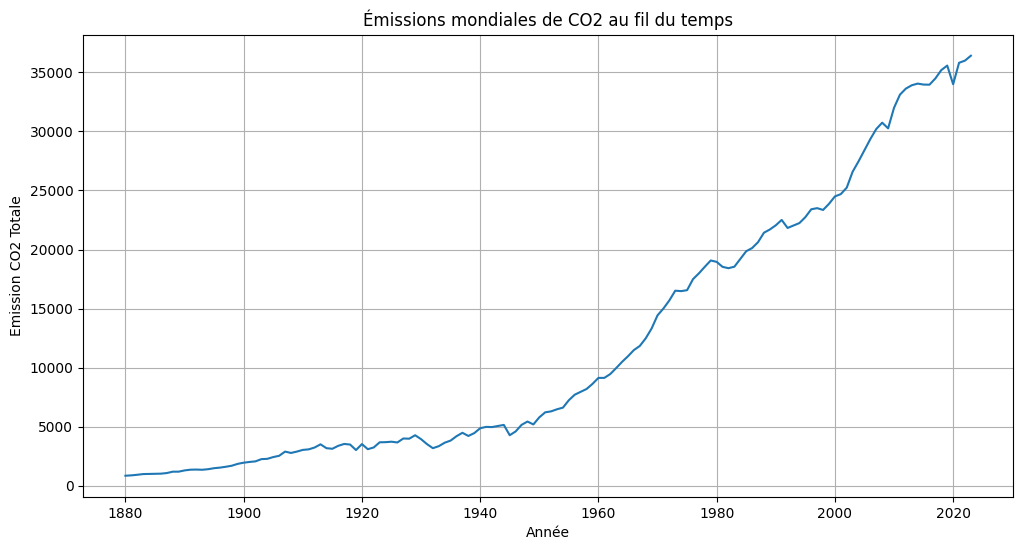

In [14]:
# Regrouper les données par année et additionner les émissions de CO2
yearly_emissions = merged_df.groupby('year')['co2'].sum()

# Création du graphique
plt.figure(figsize=(12, 6))
plt.plot(yearly_emissions.index, yearly_emissions.values)
plt.title('Émissions mondiales de CO2 au fil du temps')
plt.xlabel('Année')
plt.ylabel('Emission CO2 Totale')
plt.grid(True)
plt.show()

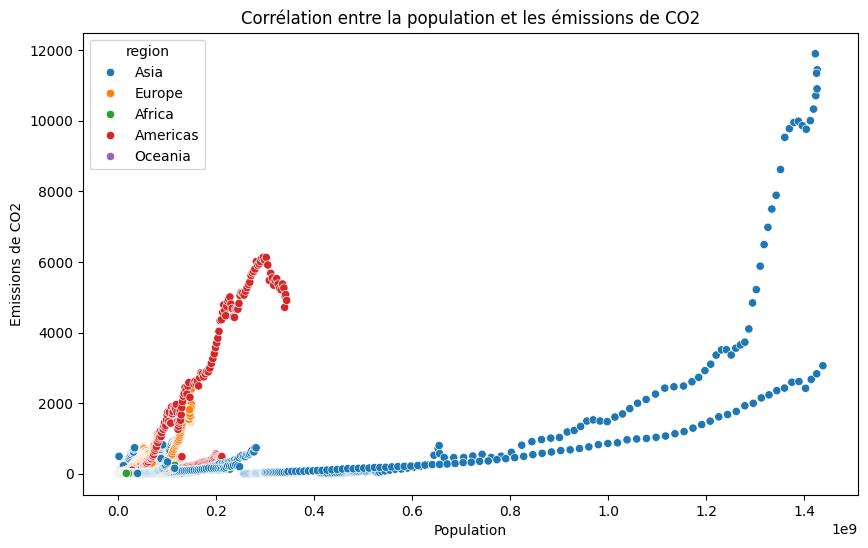

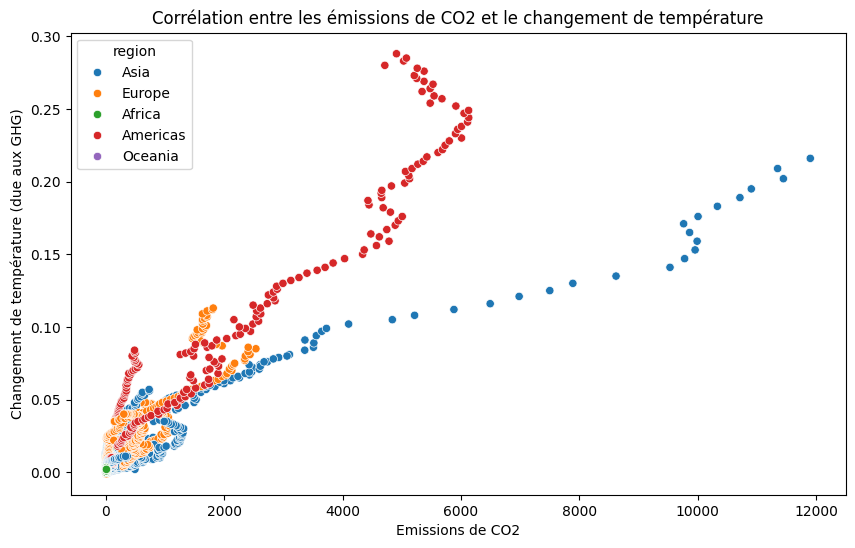

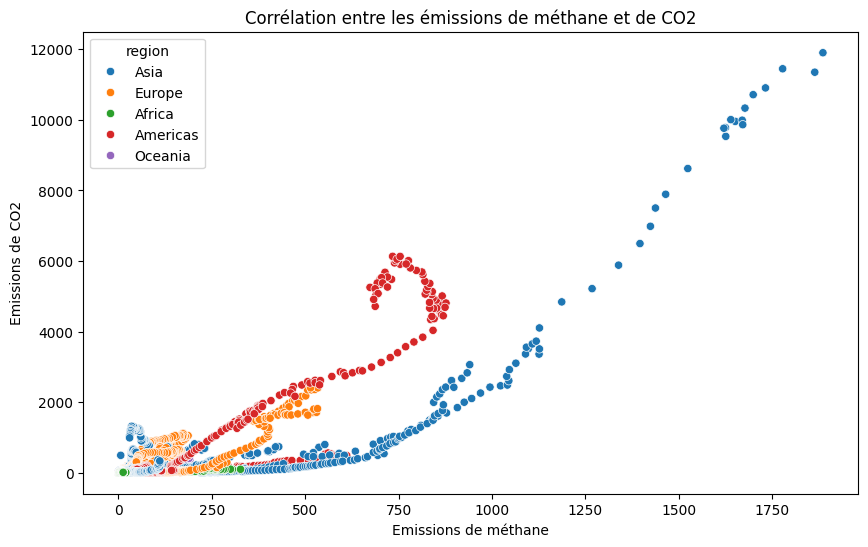

In [20]:
#  Corrélation entre la population et les émissions de CO2:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='co2', data=merged_df, hue='region')
plt.title('Corrélation entre la population et les émissions de CO2')
plt.xlabel('Population')
plt.ylabel('Emissions de CO2')
plt.show()

#  Corrélation entre les émissions de CO2 et le changement de température:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='co2', y='temperature_change_from_ghg', data=merged_df, hue='region')
plt.title('Corrélation entre les émissions de CO2 et le changement de température')
plt.xlabel('Emissions de CO2')
plt.ylabel('Changement de température (due aux GHG)')
plt.show()

# Corrélation entre différentes sources d'émission (méthane et CO2):
plt.figure(figsize=(10, 6))
sns.scatterplot(x='methane', y='co2', data=merged_df, hue='region')
plt.title('Corrélation entre les émissions de méthane et de CO2')
plt.xlabel('Emissions de méthane')
plt.ylabel('Emissions de CO2')
plt.show()

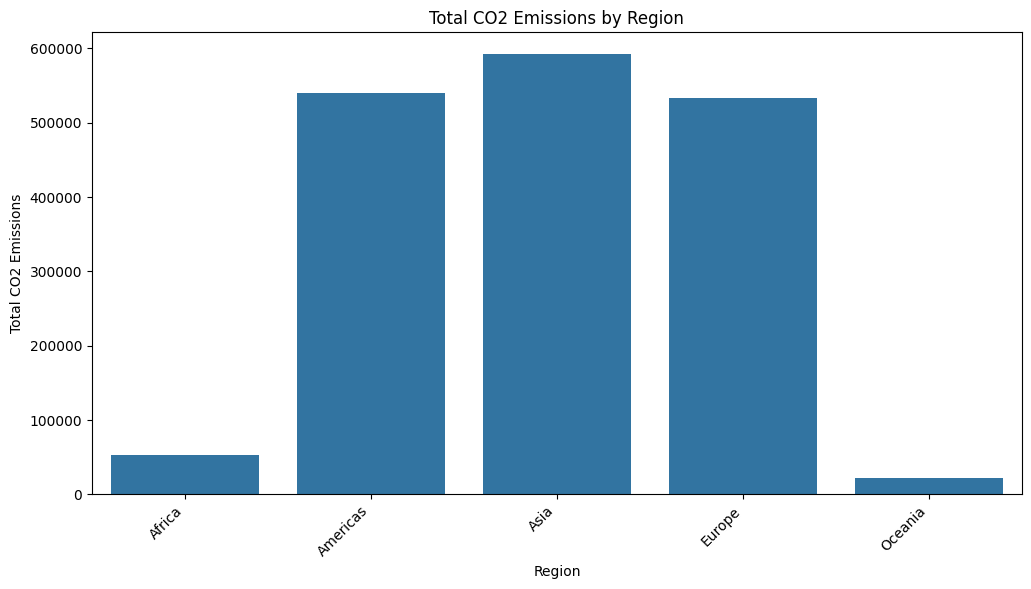

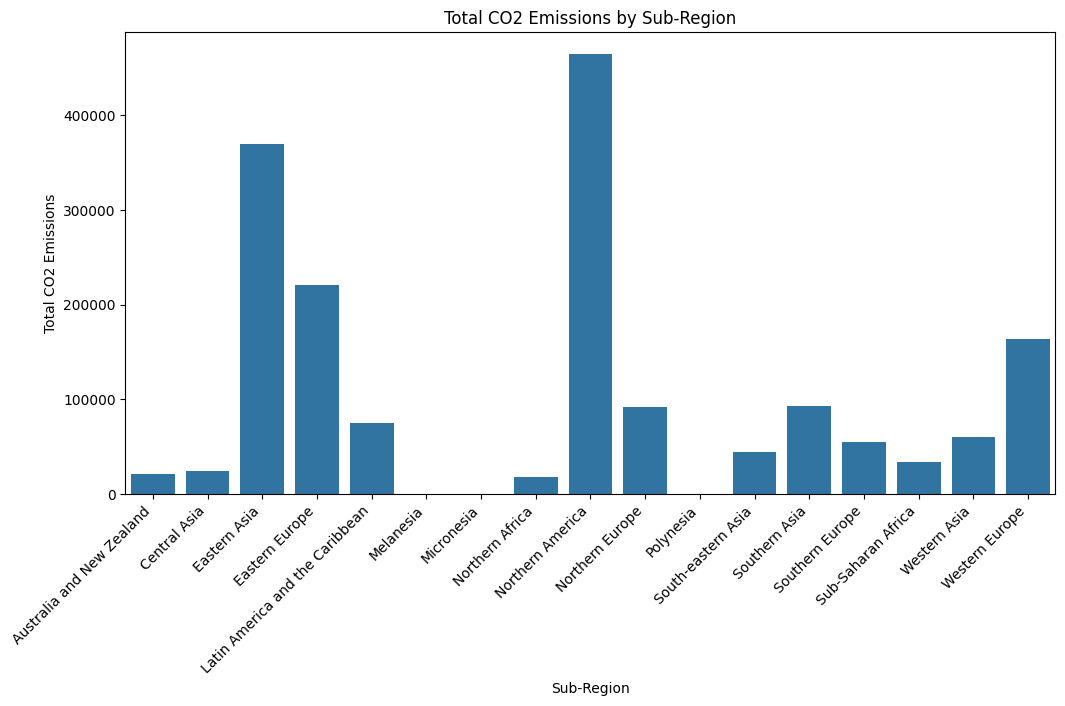

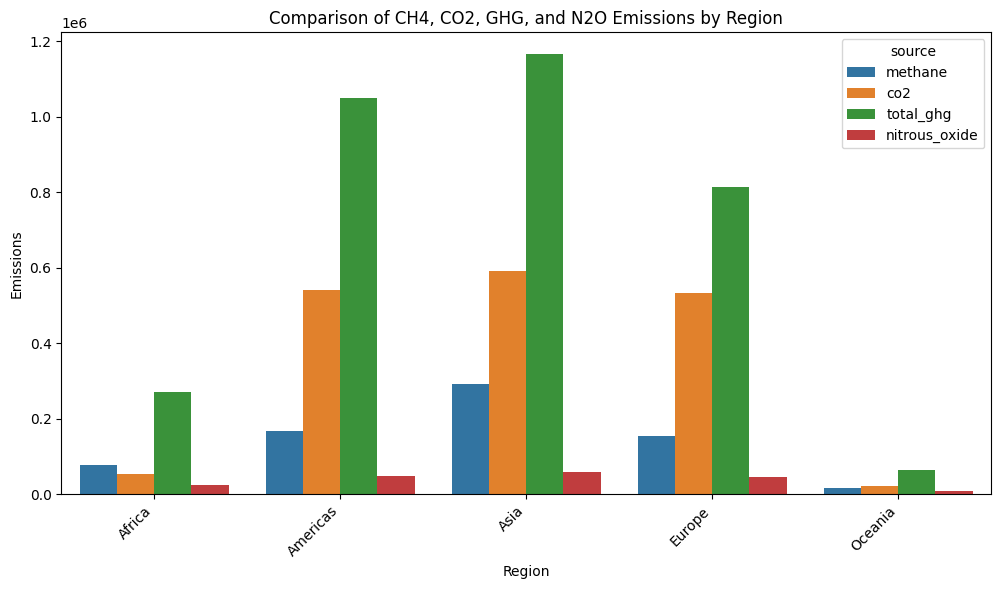

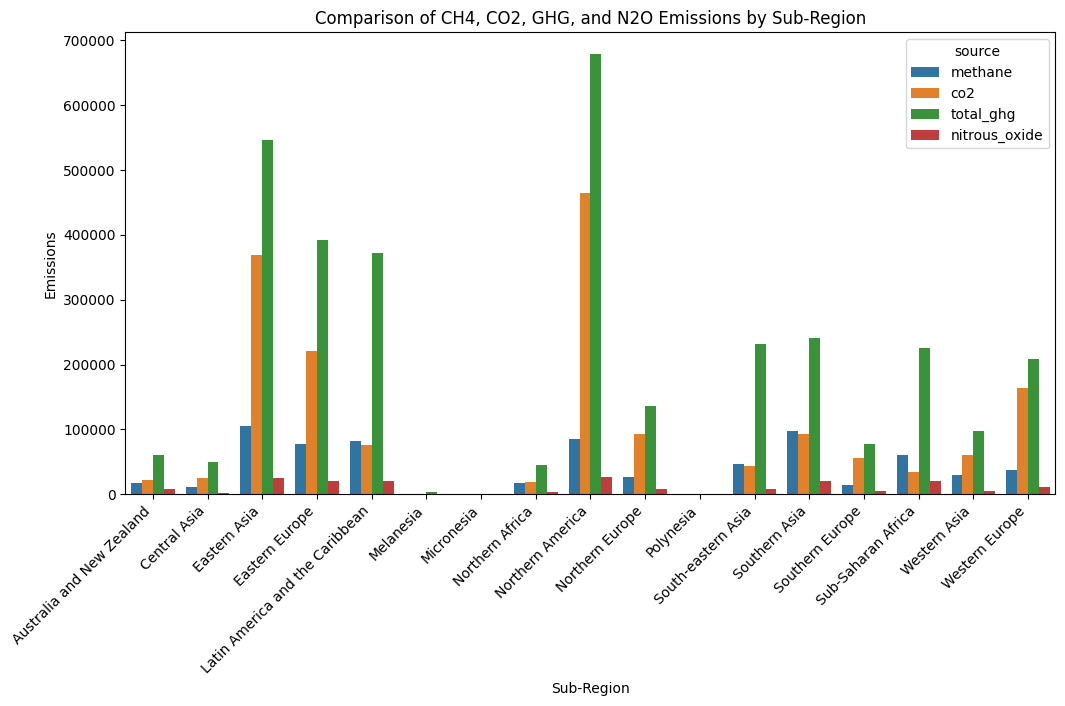

In [22]:
# 1. Comparaison des émissions totales de CO2 par région/sous-région:
def plot_co2_emissions_by_region(data, region_column='region'):
    """
    Creates a bar plot comparing total CO2 emissions by region or sub-region.

    Args:
        data: The DataFrame containing the data.
        region_column: The name of the column containing region or sub-region
                       information (default: 'region').
    """
    emissions_by_region = data.groupby(region_column)['co2'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=region_column, y='co2', data=emissions_by_region)
    plt.title(f'Total CO2 Emissions by {region_column.title()}')
    plt.xlabel(region_column.title())
    plt.ylabel('Total CO2 Emissions')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example usage:
plot_co2_emissions_by_region(merged_df, region_column='region')  # For regions
plot_co2_emissions_by_region(merged_df, region_column='sub-region') # For sub-regions


# 2. Comparaison des émissions par source (CH4, CO2, GHG, N2O) par région/sous-région:
def plot_emissions_by_source_and_region(data, region_column='region'):
    """
    Creates a bar plot comparing emissions by source (CH4, CO2, GHG, N2O)
    for each region or sub-region.

    Args:
        data: The DataFrame containing the data.
        region_column: The name of the column containing region or sub-region
                       information (default: 'region').
    """
    emissions_data = data.groupby(region_column)[['methane', 'co2', 'total_ghg', 'nitrous_oxide']].sum().reset_index()
    emissions_data = emissions_data.melt(id_vars=[region_column], var_name='source', value_name='emissions')

    plt.figure(figsize=(12, 6))
    sns.barplot(x=region_column, y='emissions', hue='source', data=emissions_data)
    plt.title(f'Comparison of CH4, CO2, GHG, and N2O Emissions by {region_column.title()}')
    plt.xlabel(region_column.title())
    plt.ylabel('Emissions')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example usage:
plot_emissions_by_source_and_region(merged_df, region_column='region')  # For regions
plot_emissions_by_source_and_region(merged_df, region_column='sub-region') # For sub-regions




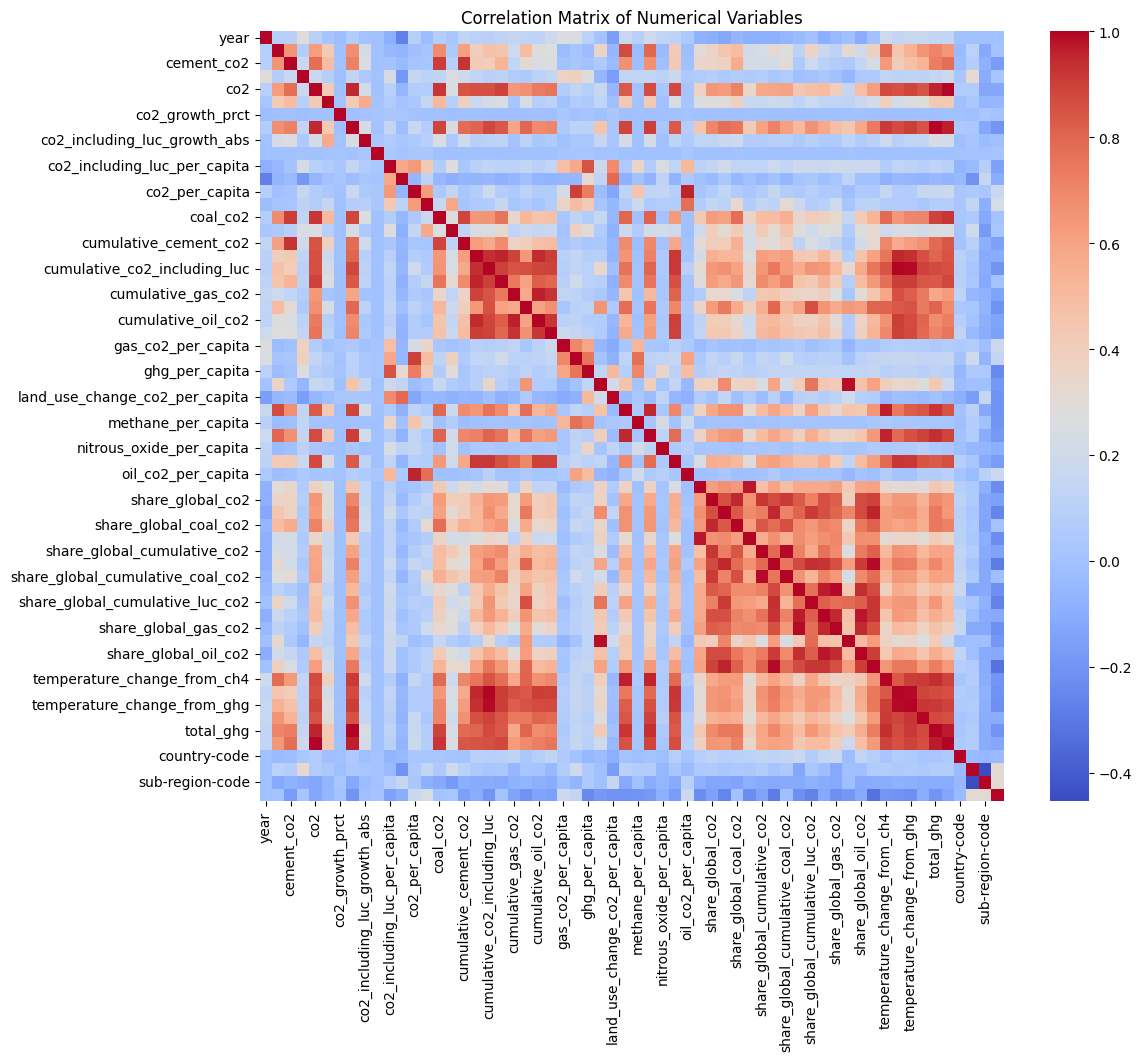

In [28]:
# 1. Matrice de corrélation entre les variables numériques:
def plot_correlation_heatmap(data):
    """
    Creates a heatmap showing the correlation matrix between numerical variables.

    Args:
        data: The DataFrame containing the data.
    """
    # Select only numerical columns for correlation calculation
    numerical_data = data.select_dtypes(include=['number'])

    # Calculate the correlation matrix
    correlation_matrix = numerical_data.corr()

    # Create the heatmap without annotations (values)
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.show()

plot_correlation_heatmap(merged_df)




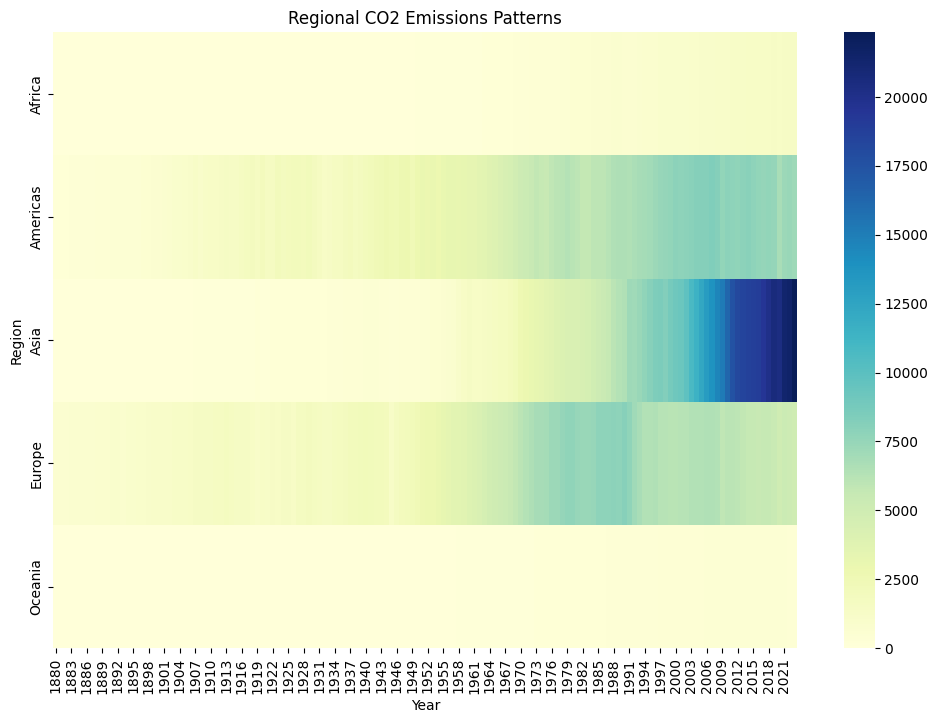

In [ ]:
heatmap_data = merged_df.pivot_table(index='region',
                                       columns='year',
                                       values='co2',
                                       aggfunc='sum')

# Créer le heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Regional CO2 Emissions Patterns')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

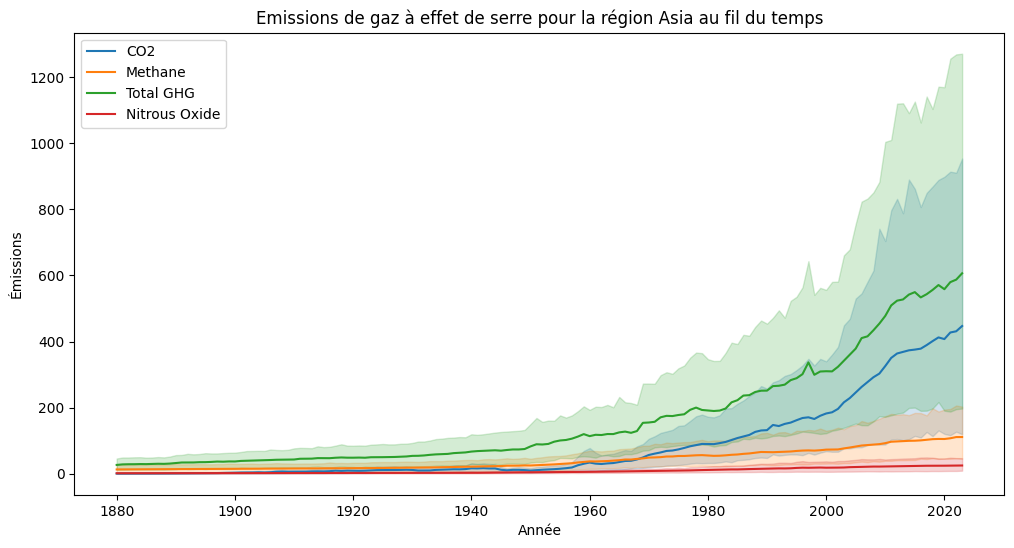

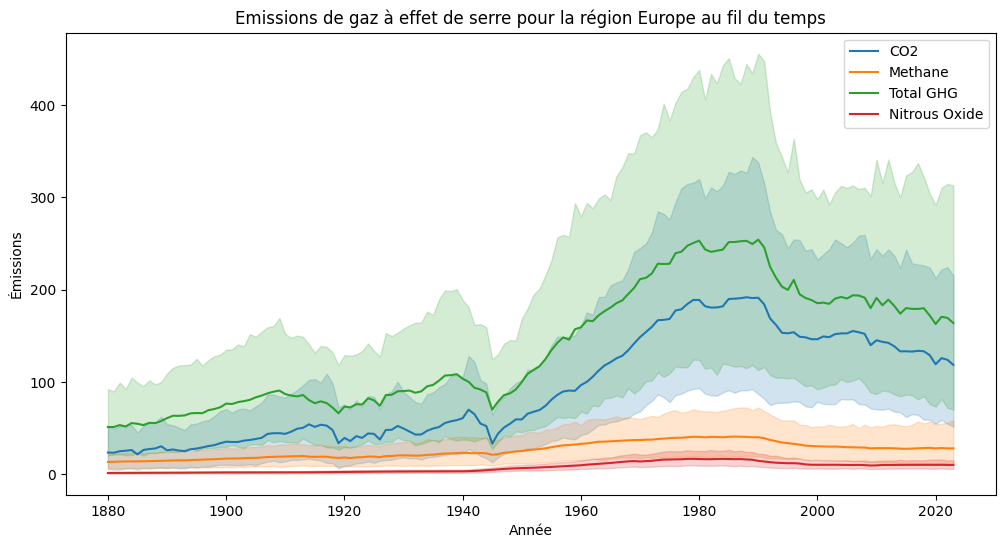

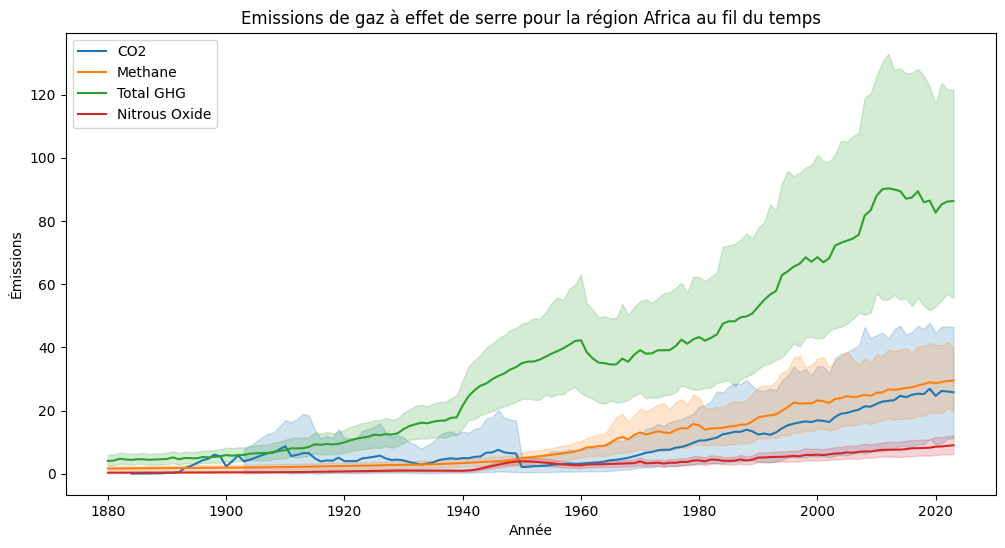

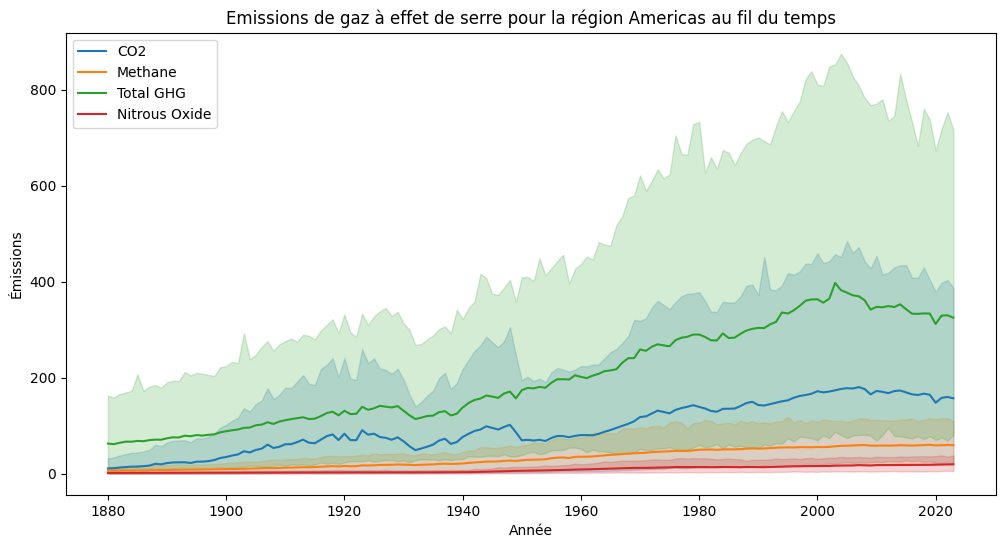

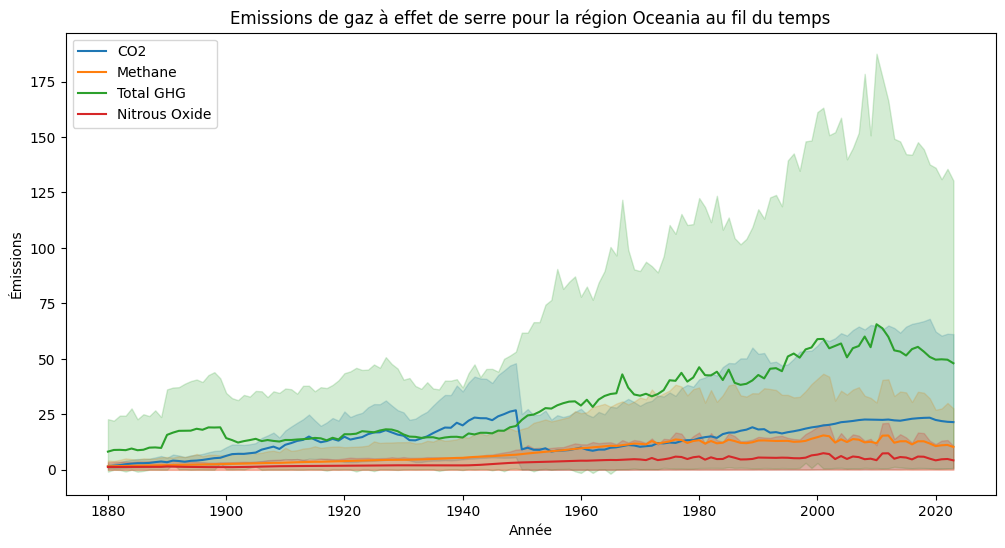

In [ ]:
# Get unique regions
regions = merged_df['region'].unique()

# Create a plot for each region
for region in regions:
    # Filter data for the current region
    region_data = merged_df[merged_df['region'] == region]

    # Create a figure and axes
    plt.figure(figsize=(12, 6))

    # Create the plot
    sns.lineplot(x='year', y='co2', data=region_data, label='CO2')  # CO2 emissions
    sns.lineplot(x='year', y='methane', data=region_data, label='Methane')  # Methane emissions
    sns.lineplot(x='year', y='total_ghg', data=region_data, label='Total GHG')  # Total GHG emissions
    sns.lineplot(x='year', y='nitrous_oxide', data=region_data, label='Nitrous Oxide')  # Nitrous Oxide emissions

    # Set plot title and labels
    plt.title(f'Emissions de gaz à effet de serre pour la région {region} au fil du temps')
    plt.xlabel('Année')
    plt.ylabel('Émissions')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()